<a href="https://colab.research.google.com/github/minhtrong20130448/ML/blob/main/HandlingMissingValue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ProjectML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ProjectML


In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

# Mushroom Dataset

* Load data

In [ ]:
data = pd.read_csv('mushroom.csv', delimiter=';')
data

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


* Missing Data

In [ ]:
print(data.isnull().sum())
print(data['stalk-root'])

classes                        0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64
0         e
1         c
2         c
3         e
4         e
       ... 
8119    NaN
8120    NaN
8121    NaN
8122    NaN
8123    NaN
Name: stalk-root, Length: 8124, dtype: object


# Drop Missing Data

In [ ]:
data.dropna(inplace=True)
data['stalk-root']

0       e
1       c
2       c
3       e
4       e
       ..
7986    b
8001    b
8038    b
8095    c
8114    c
Name: stalk-root, Length: 5644, dtype: object

* Encoder

In [ ]:
encoder = LabelEncoder()

for column in range(len(data.columns)):
  data[data.columns[column]] = encoder.fit_transform(data[data.columns[column]])

print(data['stalk-root'])

0       2
1       1
2       1
3       2
4       2
       ..
7986    0
8001    0
8038    0
8095    1
8114    1
Name: stalk-root, Length: 5644, dtype: int64


* Feature Scaling

In [ ]:
X = data.drop('classes', axis=1);
y = data['classes']

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
print(X)

      cap-shape  cap-surface  cap-color   bruises      odor  gill-attachment  \
0      0.951935     0.278952  -0.148464  0.878984  1.379182         0.056564   
1      0.951935     0.278952   1.483873  0.878984 -2.019001         0.056564   
2     -2.061032     0.278952   0.939761  0.878984 -0.319909         0.056564   
3      0.951935     1.027243   0.939761  0.878984  1.379182         0.056564   
4      0.951935     0.278952  -0.692577 -1.137677  0.812819         0.056564   
...         ...          ...        ...       ...       ...              ...   
5639  -2.061032     1.027243  -0.148464 -1.137677  0.812819         0.056564   
5640   0.951935     1.027243  -0.148464 -1.137677  0.812819         0.056564   
5641   0.951935     1.027243  -0.692577  0.878984  0.812819         0.056564   
5642   0.951935     1.027243  -1.780802 -1.137677  0.246455         0.056564   
5643  -0.855845     1.027243  -1.780802 -1.137677  0.246455       -17.679241   

      gill-spacing  gill-size  gill-col

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc_drop = round(metrics.accuracy_score(y_test, y_pred), 4)
pre_drop = round(metrics.precision_score(y_test, y_pred), 4)
recall_drop = round(metrics.recall_score(y_test, y_pred), 4)
f1_drop = round(metrics.f1_score(y_test, y_pred), 4)
print(acc_drop)
print(pre_drop)
print(recall_drop)
print(f1_drop)

0.9772
0.98
0.971
0.9755


# Replace Missing Data

In [ ]:
data = pd.read_csv('mushroom.csv', delimiter=';')
data

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
data['stalk-root'] = imputer.fit_transform(data[['stalk-root']])
data['stalk-root']

0       e
1       c
2       c
3       e
4       e
       ..
8119    b
8120    b
8121    b
8122    b
8123    b
Name: stalk-root, Length: 8124, dtype: object

In [ ]:
encoder = LabelEncoder()

for column in range(len(data.columns)):
  data[data.columns[column]] = encoder.fit_transform(data[data.columns[column]])

print(data['stalk-root'])

0       2
1       1
2       1
3       2
4       2
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: stalk-root, Length: 8124, dtype: int64


In [ ]:
X = data.drop('classes', axis=1);
y = data['classes']

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
print(X)

      cap-shape  cap-surface  cap-color   bruises      odor  gill-attachment  \
0      1.029712     0.140128  -0.198250  1.185917  0.881938         0.162896   
1      1.029712     0.140128   1.765874  1.185917 -1.970316         0.162896   
2     -2.087047     0.140128   1.373049  1.185917 -0.544189         0.162896   
3      1.029712     0.953270   1.373049  1.185917  0.881938         0.162896   
4      1.029712     0.140128  -0.591075 -0.843230  0.406562         0.162896   
...         ...          ...        ...       ...       ...              ...   
8119  -0.216992     0.140128  -0.198250 -0.843230  0.406562        -6.138869   
8120   1.029712     0.140128  -0.198250 -0.843230  0.406562        -6.138869   
8121  -0.840343     0.140128  -0.198250 -0.843230  0.406562        -6.138869   
8122  -0.216992     0.953270  -0.198250 -0.843230  1.832689         0.162896   
8123   1.029712     0.140128  -0.198250 -0.843230  0.406562        -6.138869   

      gill-spacing  gill-size  gill-col

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

acc_replace = round(metrics.accuracy_score(y_test, y_pred), 4)
pre_replace = round(metrics.precision_score(y_test, y_pred), 4)
recall_replace = round(metrics.recall_score(y_test, y_pred), 4)
f1_replace = round(metrics.f1_score(y_test, y_pred), 4)

print(acc_replace)
print(pre_replace)
print(recall_replace)
print(f1_replace)

0.9662
0.971
0.96
0.9655


# Predict Missing Data

* Train dữ liệu

In [ ]:
data = pd.read_csv('mushroom.csv', delimiter=';')

data_with_missing  = data[data.isnull().any(axis=1)]
data_without_missing = data.dropna()

encoder = LabelEncoder()

for column in data_without_missing.columns:
    data_without_missing[column] = encoder.fit_transform(data_without_missing[column])

for column in data_with_missing.columns:
    data_with_missing[column] = encoder.fit_transform(data_with_missing[column])

X = data_without_missing.drop('stalk-root', axis=1)
y = data_without_missing['stalk-root']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()

model.fit(X_train, y_train)

* Thay thế dữ liệu

In [ ]:
y_pred = model.predict(data_with_missing.drop('stalk-root', axis=1))

data_with_missing['stalk-root'] = y_pred

imputed_data = pd.concat([data_without_missing, data_with_missing])
print(imputed_data)
print(imputed_data['stalk-root'])

      classes  cap-shape  cap-surface  cap-color  bruises  odor  \
0           1          5            2          4        1     6   
1           0          5            2          7        1     0   
2           0          0            2          6        1     3   
3           1          5            3          6        1     6   
4           0          5            2          3        0     5   
...       ...        ...          ...        ...      ...   ...   
8119        0          2            1          3        0     1   
8120        0          3            1          3        0     1   
8121        0          1            1          3        0     1   
8122        1          2            2          3        0     3   
8123        0          3            1          3        0     1   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   1             0          1           2  ...   
1                   1             0          0           2  .

<ipython-input-32-64cfe927100e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_missing['stalk-root'] = y_pred


In [ ]:
X_imp = imputed_data.drop('classes', axis=1)
y_imp = imputed_data['classes']

scaler = StandardScaler()
X_imp = pd.DataFrame(scaler.fit_transform(X_imp), columns = X_imp.columns)

X_train, X_test, y_train, y_test = train_test_split(X_imp, y_imp, test_size=0.2)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


acc_predict = round(metrics.accuracy_score(y_test, y_pred), 4)
pre_predict = round(metrics.precision_score(y_test, y_pred), 4)
recall_predict = round(metrics.recall_score(y_test, y_pred), 4)
f1_predict = round(metrics.f1_score(y_test, y_pred), 4)

print(acc_predict)
print(pre_predict)
print(recall_predict)
print(f1_predict)

0.9748
0.9729
0.9742
0.9735


# Đánh giá

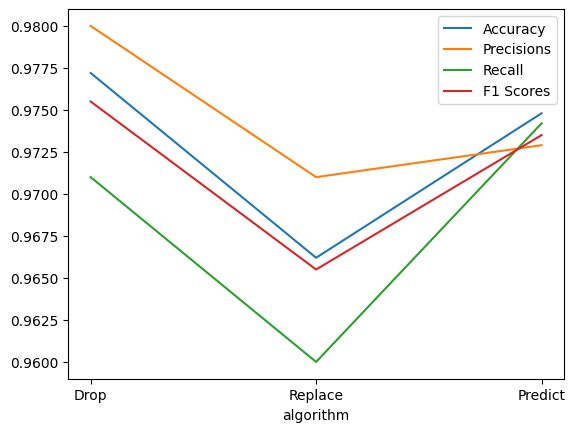

In [ ]:
algorithm = ['Drop', 'Replace','Predict']
values_accs = [acc_drop, acc_replace, acc_predict]
values_pres = [pre_drop, pre_replace, pre_predict]
values_recalls = [recall_drop, recall_replace, recall_predict]
values_f1s = [f1_drop, f1_replace, f1_predict]

plt.plot(algorithm, values_accs, label="Accuracy")
plt.plot(algorithm, values_pres, label="Precisions")
plt.plot(algorithm, values_recalls, label="Recall")
plt.plot(algorithm, values_f1s, label="F1 Scores")
plt.xlabel("algorithm")
plt.legend()
